# Reading VPIXX Calibration files

Prior to each block, normally a calibration measurment is performed, and the results are saved as jpegs separately for the left and right eye. This code shows you how to read the data.

In [1]:
from eyetools.calibrationchecker import analyze_vpixx_polyresponse

Here the paths to the calibration files.

In [2]:
calpathL = './data/calibration/19640320lczm/PolyResponse_L.jpg'
calpathR = './data/calibration/19640320lczm/PolyResponse_R.jpg'


The challenge of the relevant function is to detect targets and the closest fixation. This is somtimes not easy, but the defaults in the function seem to work ok. In case you notice in the ouputs that the detection is off, try messing around with the values.

```python
def analyze_vpixx_polyresponse(
    jpeg_path: Union[str, Path],
    # saving
    outdir: Optional[Union[str, Path]] = None,
    save_outputs: bool = False,
    make_overlay: bool = False,
    # matching
    max_dist_px: float = 250,
    # white detection
    white_min_area: float = 150,
    white_max_area: float = 5000,
    white_threshold: int = 220,
    # measured detection
    measured_hsv_ranges: Optional[List[Tuple[Tuple[int, int, int], Tuple[int, int, int]]]] = None,
    measured_min_area: float = 40,
    measured_max_area: float = 20000,
    expected_n_measured: Optional[int] = 13,
    measured_circularity_min: Optional[float] = 0.65,
    # optional returns / diagnostics
    return_masks: bool = False,
    verbose: bool = False,
    # plotting
    plot: bool = False,
    annotate: bool = False,
    ax=None,
    save_plot_path: Optional[Union[str, Path]] = None,
)
```

=== VPIXX PolyResponse Summary ===
Image: data/calibration/19640320lczm/PolyResponse_L.jpg
Targets detected: 13
Measured fixations detected: 13
n_targets: 13.0
n_matched: 13.0
median_dist_px: 14.194285161614197
rms_dist_px: 18.47104071146673
max_dist_px: 34.68110211034957


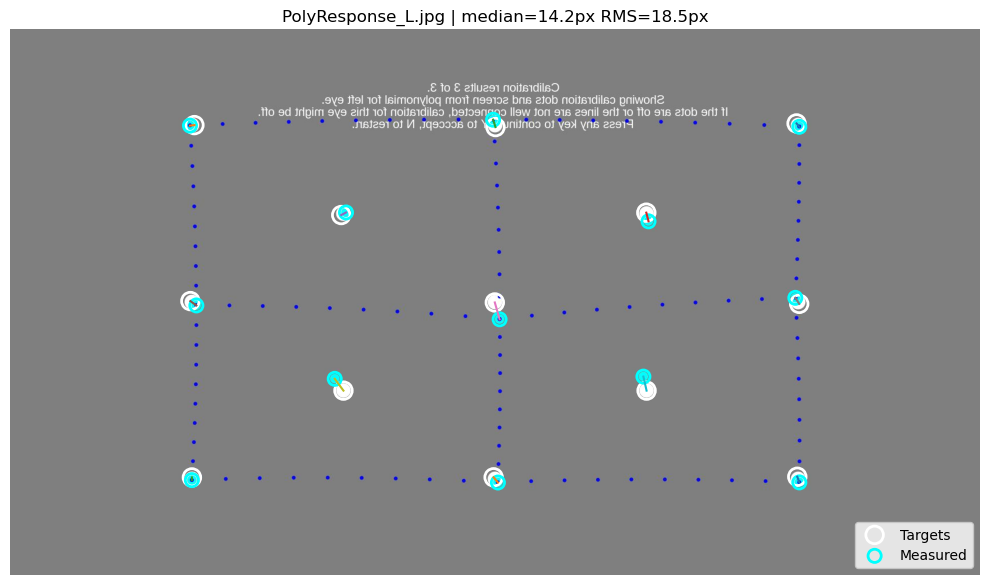

In [ ]:
# Run for the left eye
calL_res = analyze_vpixx_polyresponse(calpathL, plot=True, verbose=True)

=== VPIXX PolyResponse Summary ===
Image: data/calibration/19640320lczm/PolyResponse_R.jpg
Targets detected: 13
Measured fixations detected: 13
n_targets: 13.0
n_matched: 13.0
median_dist_px: 10.867259218094729
rms_dist_px: 14.176437621974221
max_dist_px: 24.814506883622254


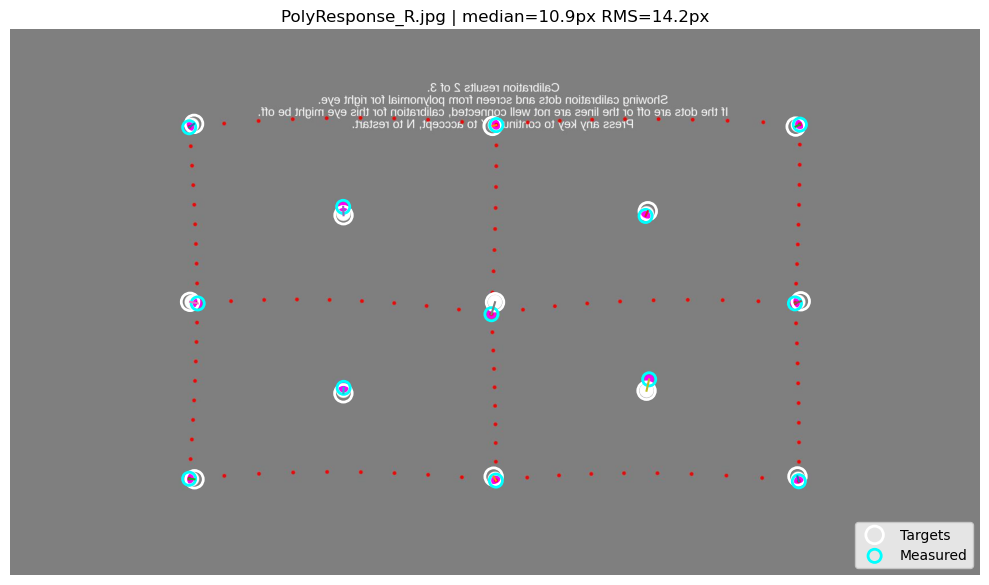

In [5]:
# Run for the right eye
calR_res = analyze_vpixx_polyresponse(calpathR, plot=True, verbose=True)


These plots give you a good impression of how the calibration went and whether you need to adapt some parameters.

The output variables contain the raw data for each target and some summary statistics.

In [ ]:
#Raw data
calL_res[0]


,target_id,target_x,target_y,measured_x,measured_y,dx_px,dy_px,dist_px
0,0,1556.426614,185.664710,1561.824111,192.335310,5.397496,6.670600,8.580785
1,1,364.506078,188.984005,355.738562,190.000000,-8.767516,1.015995,8.826187
2,2,960.433538,192.870757,955.759760,178.281682,-4.673778,-14.589075,15.319442
3,3,1259.007025,362.297506,1263.376608,379.459649,4.369583,17.162143,17.709670
4,4,655.131157,367.001145,664.589595,361.938985,9.458438,-5.062160,10.727885
5,5,356.547233,537.335414,368.430581,545.941896,11.883348,8.606482,14.672611
6,6,959.130524,540.052385,968.618243,573.410473,9.487719,33.358088,34.681102
7,7,1561.662821,542.788889,1553.954628,530.869933,-7.708193,-11.918955,14.194285
8,8,659.518581,714.535755,642.260201,691.204557,-17.258380,-23.331197,29.020621
9,9,1259.518581,714.535755,1253.237613,686.771959,-6.280968,-27.763795,28.465398


In [7]:
#Summary results
calL_res[1]

{'n_targets': 13.0,
 'n_matched': 13.0,
 'median_dist_px': 14.194285161614197,
 'rms_dist_px': 18.47104071146673,
 'max_dist_px': 34.68110211034957}

It is a good idea to save this data and consider the quality of the calibration in your results.